# Pacotes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from scipy import stats



# 0. Os dados

## 0.1 FFF_LTfactor

In [2]:
FFF_LTfactor = pd.read_csv("Fama_French_Factors.csv", sep = ";")

In [3]:
display(FFF_LTfactor)

,Unnamed: 0,Rm-Rf,SMB,HML,RMW,CMA,RF,Mom,ST_Rev,LT_Rev
0,19900702,0.30,-0.39,-0.13,0.38,-0.12,0.032,0.77,-0.02,-0.32
1,19900703,0.13,-0.18,-0.35,0.50,-0.21,0.032,0.58,-0.17,-0.49
2,19900705,-1.04,0.44,0.02,-0.10,0.11,0.032,0.22,-0.23,0.13
3,19900706,0.61,-0.39,-0.25,0.31,-0.13,0.032,0.16,-0.21,-0.15
4,19900709,0.22,-0.32,-0.14,0.21,-0.40,0.032,0.35,-0.14,0.10
...,...,...,...,...,...,...,...,...,...,...
6420,20151224,-0.11,0.27,-0.04,-0.21,0.08,0.000,0.08,-0.13,-0.18
6421,20151228,-0.29,-0.53,-0.36,-0.01,-0.07,0.000,1.41,-1.09,-0.64
6422,20151229,1.05,0.03,-0.31,0.02,-0.34,0.000,0.23,0.21,-0.18
6423,20151230,-0.74,-0.17,-0.12,0.01,0.15,0.000,0.49,-0.50,-0.26


In [4]:
# cria coluna de datas baseado em unnamed
FFF_LTfactor["Date"] = pd.to_datetime(FFF_LTfactor["Unnamed: 0"], format="%Y%m%d")

In [5]:
# coloca a coluna data como indice
FFF_LTfactor = FFF_LTfactor.set_index("Date")

In [6]:
# exclui a coluna unnamed
FFF_LTfactor = FFF_LTfactor.drop(columns=["Unnamed: 0"])

In [7]:
# seleciona os intervalos de crise

intervalos = [
    ("2000-03-24", "2002-10-09"),
    ("2007-10-09", "2009-03-09"),
    ]

# dataframe baseada nos intervalos
FFF_LTfactor_crisis = pd.concat([FFF_LTfactor.loc[inicio:fim] for inicio, fim in intervalos])

In [8]:
display(FFF_LTfactor)


,Rm-Rf,SMB,HML,RMW,CMA,RF,Mom,ST_Rev,LT_Rev
Date,,,,,,,,,
1990-07-02,0.30,-0.39,-0.13,0.38,-0.12,0.032,0.77,-0.02,-0.32
1990-07-03,0.13,-0.18,-0.35,0.50,-0.21,0.032,0.58,-0.17,-0.49
1990-07-05,-1.04,0.44,0.02,-0.10,0.11,0.032,0.22,-0.23,0.13
1990-07-06,0.61,-0.39,-0.25,0.31,-0.13,0.032,0.16,-0.21,-0.15
1990-07-09,0.22,-0.32,-0.14,0.21,-0.40,0.032,0.35,-0.14,0.10
...,...,...,...,...,...,...,...,...,...
2015-12-24,-0.11,0.27,-0.04,-0.21,0.08,0.000,0.08,-0.13,-0.18
2015-12-28,-0.29,-0.53,-0.36,-0.01,-0.07,0.000,1.41,-1.09,-0.64
2015-12-29,1.05,0.03,-0.31,0.02,-0.34,0.000,0.23,0.21,-0.18


In [9]:
display(FFF_LTfactor_crisis)

,Rm-Rf,SMB,HML,RMW,CMA,RF,Mom,ST_Rev,LT_Rev
Date,,,,,,,,,
2000-03-24,0.11,-0.38,-0.03,0.04,-0.21,0.020,-0.06,-0.12,-0.57
2000-03-27,-0.39,0.25,-0.45,-0.11,0.38,0.020,0.99,0.14,-0.04
2000-03-28,-1.34,-0.98,0.94,0.79,-0.04,0.020,-1.41,0.71,-0.15
2000-03-29,-1.00,-2.14,1.90,2.85,0.83,0.020,-2.84,-1.35,-1.09
2000-03-30,-1.76,-1.44,1.64,1.50,0.71,0.020,-3.43,-1.20,-0.76
...,...,...,...,...,...,...,...,...,...
2009-03-03,-0.71,-1.06,-2.42,-0.04,-0.85,0.001,0.36,-1.47,-0.71
2009-03-04,2.42,0.18,-0.97,-0.56,-0.12,0.001,-1.66,0.31,-0.86
2009-03-05,-4.21,-1.12,-3.01,0.64,0.06,0.001,3.32,-4.41,0.49


## 0.2 FFF_ret

In [10]:

FFF_ret = pd.read_csv("FFF_ret.csv")
display(FFF_ret)


,Unnamed: 0,Rm-Rf,SMB,HML,RMW,CMA,Rf,Mom,ST_Rev,Rp_ew_cc,Rp_ew_fi,Rp_vw_cc,Rp_vw_fi
0,01/07/1991,1.62,-1.10,-0.35,0.33,-0.53,0.022,0.71,0.72,0.000000,0.000000,0.000000,0.000000
1,02/07/1991,-0.12,0.00,-0.07,0.40,-0.13,0.022,0.26,-0.34,0.000000,0.000000,0.000000,0.000000
2,03/07/1991,-0.98,0.26,-0.09,0.03,0.11,0.022,0.23,-0.15,-0.000113,-0.001129,-0.000113,-0.001129
3,05/07/1991,0.17,-0.17,-0.11,0.07,0.01,0.022,0.09,0.34,0.000633,0.006334,0.000629,0.006299
4,08/07/1991,0.82,-0.54,-0.23,0.30,-0.49,0.022,0.41,0.89,0.000405,0.002701,0.000404,0.002685
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6168,24/12/2015,-0.11,0.28,-0.08,-0.15,0.08,0.000,0.08,-0.16,0.001576,0.001751,0.001634,0.001843
6169,28/12/2015,-0.28,-0.53,-0.35,0.10,-0.06,0.000,1.41,-1.08,-0.004772,-0.005303,-0.004378,-0.004936
6170,29/12/2015,1.05,0.03,-0.31,0.07,-0.34,0.000,0.20,0.20,0.001321,0.001468,0.001126,0.001270
6171,30/12/2015,-0.74,-0.18,-0.08,0.02,0.15,0.000,0.51,-0.45,-0.000131,-0.000145,0.000329,0.000371


In [11]:
# cria coluna datas baseada em unnamed

FFF_ret["Date"] = pd.to_datetime(FFF_ret["Unnamed: 0"], dayfirst=True) 

In [12]:
# transforma coluna date em indice
FFF_ret = FFF_ret.set_index("Date")

In [13]:
#salva o vetor dos retornos de Rp_vw_fi 
rf_vw_fi = FFF_ret["Rp_vw_fi"]

In [14]:
display(rf_vw_fi)

Date
1991-07-01    0.000000
1991-07-02    0.000000
1991-07-03   -0.001129
1991-07-05    0.006299
1991-07-08    0.002685
                ...   
2015-12-24    0.001843
2015-12-28   -0.004936
2015-12-29    0.001270
2015-12-30    0.000371
2015-12-31   -0.001366
Name: Rp_vw_fi, Length: 6173, dtype: float64

## 0.3 df final

In [15]:
# df é o dataframe dos fatores com a serie de retornos rf_vw_fi, conforme os intervalos de crise
df = FFF_LTfactor_crisis.join(rf_vw_fi, how="inner")


In [16]:
display(df)

,Rm-Rf,SMB,HML,RMW,CMA,RF,Mom,ST_Rev,LT_Rev,Rp_vw_fi
Date,,,,,,,,,,
2000-03-24,0.11,-0.38,-0.03,0.04,-0.21,0.020,-0.06,-0.12,-0.57,-0.011293
2000-03-27,-0.39,0.25,-0.45,-0.11,0.38,0.020,0.99,0.14,-0.04,-0.005916
2000-03-28,-1.34,-0.98,0.94,0.79,-0.04,0.020,-1.41,0.71,-0.15,0.003712
2000-03-29,-1.00,-2.14,1.90,2.85,0.83,0.020,-2.84,-1.35,-1.09,-0.014767
2000-03-30,-1.76,-1.44,1.64,1.50,0.71,0.020,-3.43,-1.20,-0.76,-0.003904
...,...,...,...,...,...,...,...,...,...,...
2009-03-03,-0.71,-1.06,-2.42,-0.04,-0.85,0.001,0.36,-1.47,-0.71,0.001790
2009-03-04,2.42,0.18,-0.97,-0.56,-0.12,0.001,-1.66,0.31,-0.86,0.006620
2009-03-05,-4.21,-1.12,-3.01,0.64,0.06,0.001,3.32,-4.41,0.49,-0.007071


In [17]:
# Criar a coluna de variável dependente (Excesso de retorno)
df["ExcessRet"] = df["Rp_vw_fi"] - df["RF"]

In [18]:
# organizando dataframe apenas com variáveis para a regressão
df = df.drop(columns=["RF", "Rp_vw_fi"])

In [19]:
display(df)

,Rm-Rf,SMB,HML,RMW,CMA,Mom,ST_Rev,LT_Rev,ExcessRet
Date,,,,,,,,,
2000-03-24,0.11,-0.38,-0.03,0.04,-0.21,-0.06,-0.12,-0.57,-0.031293
2000-03-27,-0.39,0.25,-0.45,-0.11,0.38,0.99,0.14,-0.04,-0.025916
2000-03-28,-1.34,-0.98,0.94,0.79,-0.04,-1.41,0.71,-0.15,-0.016288
2000-03-29,-1.00,-2.14,1.90,2.85,0.83,-2.84,-1.35,-1.09,-0.034767
2000-03-30,-1.76,-1.44,1.64,1.50,0.71,-3.43,-1.20,-0.76,-0.023904
...,...,...,...,...,...,...,...,...,...
2009-03-03,-0.71,-1.06,-2.42,-0.04,-0.85,0.36,-1.47,-0.71,0.000790
2009-03-04,2.42,0.18,-0.97,-0.56,-0.12,-1.66,0.31,-0.86,0.005620
2009-03-05,-4.21,-1.12,-3.01,0.64,0.06,3.32,-4.41,0.49,-0.008071


In [20]:
# conferindo NA's

print(df.isna().sum())      
print(np.isfinite(df).all())

Rm-Rf          0
SMB            0
HML            0
RMW            0
CMA            0
Mom            0
ST_Rev         0
LT_Rev         0
ExcessRet    256
dtype: int64
Rm-Rf         True
SMB           True
HML           True
RMW           True
CMA           True
Mom           True
ST_Rev        True
LT_Rev        True
ExcessRet    False
dtype: bool


In [21]:
# excluindo NA's
df = df.dropna()

In [22]:
display(df)

,Rm-Rf,SMB,HML,RMW,CMA,Mom,ST_Rev,LT_Rev,ExcessRet
Date,,,,,,,,,
2000-03-24,0.11,-0.38,-0.03,0.04,-0.21,-0.06,-0.12,-0.57,-0.031293
2000-03-27,-0.39,0.25,-0.45,-0.11,0.38,0.99,0.14,-0.04,-0.025916
2000-03-28,-1.34,-0.98,0.94,0.79,-0.04,-1.41,0.71,-0.15,-0.016288
2000-03-29,-1.00,-2.14,1.90,2.85,0.83,-2.84,-1.35,-1.09,-0.034767
2000-03-30,-1.76,-1.44,1.64,1.50,0.71,-3.43,-1.20,-0.76,-0.023904
...,...,...,...,...,...,...,...,...,...
2009-03-03,-0.71,-1.06,-2.42,-0.04,-0.85,0.36,-1.47,-0.71,0.000790
2009-03-04,2.42,0.18,-0.97,-0.56,-0.12,-1.66,0.31,-0.86,0.005620
2009-03-05,-4.21,-1.12,-3.01,0.64,0.06,3.32,-4.41,0.49,-0.008071


In [23]:
#conferindo NA's de novo
print(df.isna().sum())      
print(np.isfinite(df).all())

Rm-Rf        0
SMB          0
HML          0
RMW          0
CMA          0
Mom          0
ST_Rev       0
LT_Rev       0
ExcessRet    0
dtype: int64
Rm-Rf        True
SMB          True
HML          True
RMW          True
CMA          True
Mom          True
ST_Rev       True
LT_Rev       True
ExcessRet    True
dtype: bool


# 1. Exploração Inicial

## 1.1 primeira análise

In [24]:
# Matriz de correlação entre todas as variáveis independentes e dependentes
corr = df.corr()
display(corr)

,Rm-Rf,SMB,HML,RMW,CMA,Mom,ST_Rev,LT_Rev,ExcessRet
Rm-Rf,1.000000,-0.105632,-0.037760,-0.460275,-0.476918,-0.460627,0.595625,-0.375320,0.127948
SMB,-0.105632,1.000000,0.045402,-0.272937,0.038575,0.095714,0.048339,0.336921,-0.086394
HML,-0.037760,0.045402,1.000000,0.276136,0.484541,-0.330635,-0.118649,0.474008,0.021439
RMW,-0.460275,-0.272937,0.276136,1.000000,0.623032,0.218503,-0.499338,0.098984,-0.045127
CMA,-0.476918,0.038575,0.484541,0.623032,1.000000,0.246750,-0.509611,0.524156,-0.068097
Mom,-0.460627,0.095714,-0.330635,0.218503,0.246750,1.000000,-0.277385,0.285311,-0.103092
ST_Rev,0.595625,0.048339,-0.118649,-0.499338,-0.509611,-0.277385,1.000000,-0.315934,0.161295
LT_Rev,-0.375320,0.336921,0.474008,0.098984,0.524156,0.285311,-0.315934,1.000000,-0.045231
ExcessRet,0.127948,-0.086394,0.021439,-0.045127,-0.068097,-0.103092,0.161295,-0.045231,1.000000


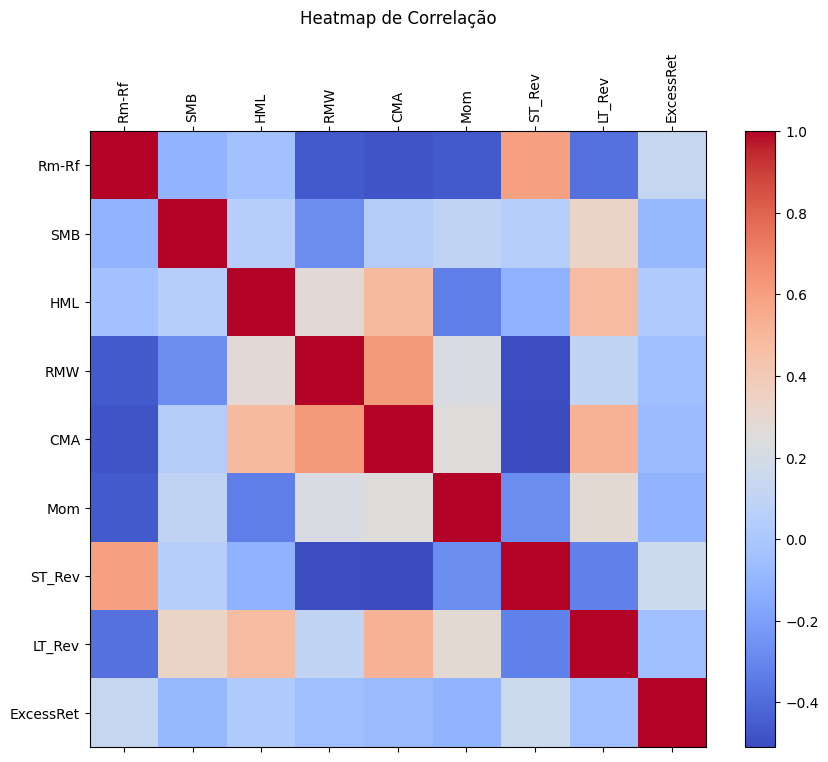

In [25]:

# heatmap das correlações

fig, ax = plt.subplots(figsize=(10,8))
cax = ax.matshow(corr, cmap="coolwarm")

# Barra de cores
plt.colorbar(cax)

# Colocar os nomes das variáveis no eixo
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.columns)

plt.title("Heatmap de Correlação", pad=20)
plt.show()

In [26]:
# correlação de ExcessRet com as demais
corr_with_excess = corr["ExcessRet"].drop("ExcessRet")
print(corr_with_excess)

Rm-Rf     0.127948
SMB      -0.086394
HML       0.021439
RMW      -0.045127
CMA      -0.068097
Mom      -0.103092
ST_Rev    0.161295
LT_Rev   -0.045231
Name: ExcessRet, dtype: float64


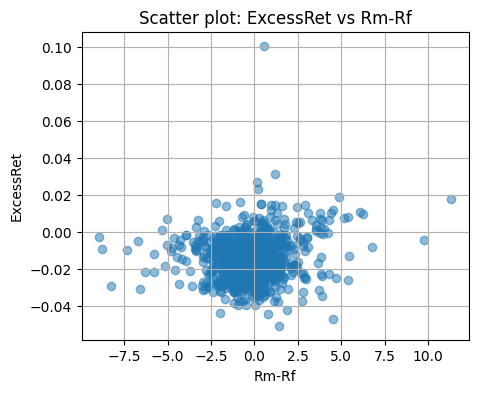

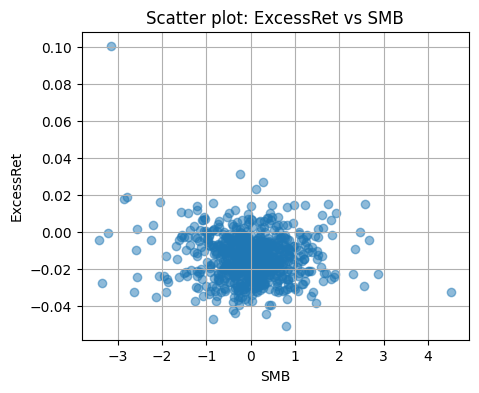

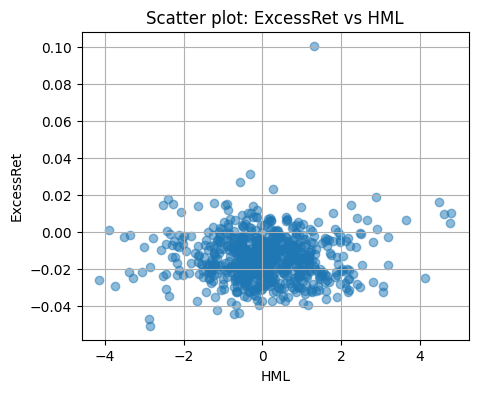

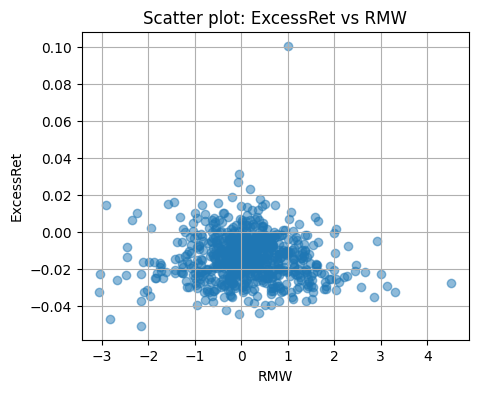

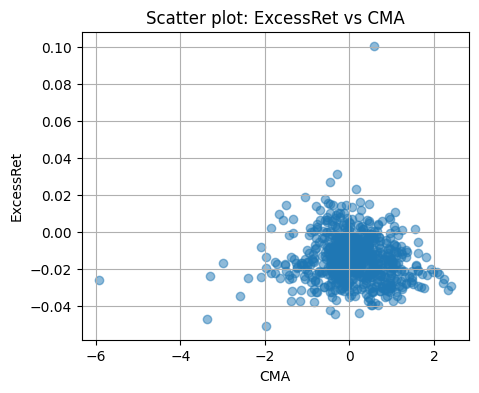

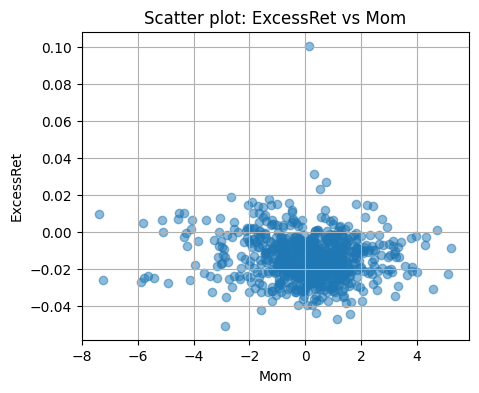

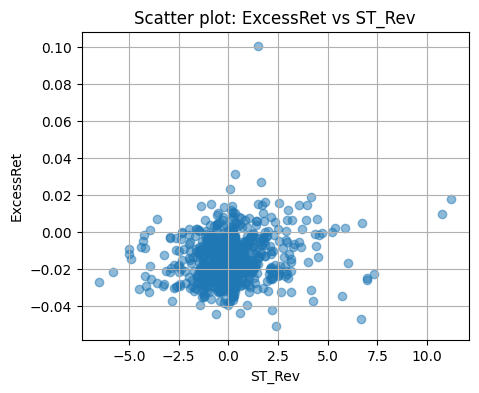

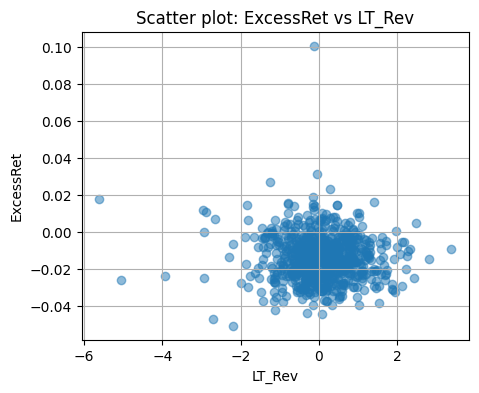

In [27]:
# observar scatterplot de Y contra demais

y = "ExcessRet"
X = ["Rm-Rf", "SMB", "HML", "RMW", "CMA", "Mom", "ST_Rev", "LT_Rev"]

for col in X:
    plt.figure(figsize=(5,4))
    plt.scatter(df[col], df[y], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel(y)
    plt.title(f"Scatter plot: {y} vs {col}")
    plt.grid(True)
    plt.show()

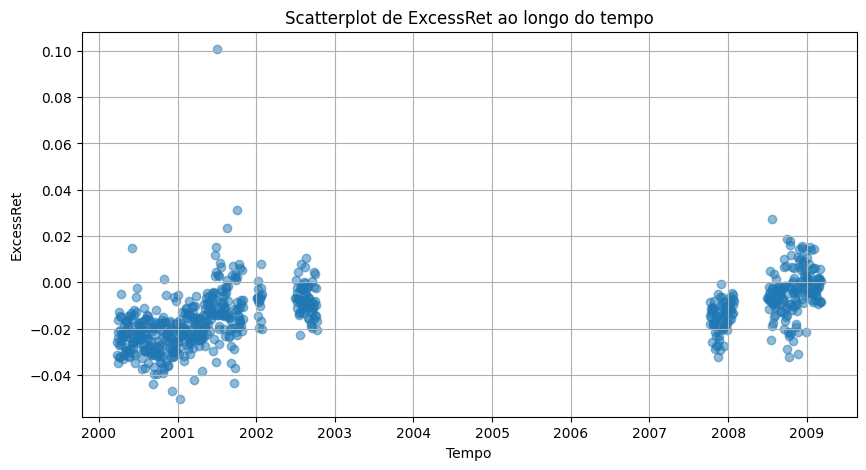

In [28]:
plt.figure(figsize=(10,5))
plt.scatter(df.index, df["ExcessRet"], alpha=0.5)
plt.xlabel("Tempo")
plt.ylabel("ExcessRet")
plt.title("Scatterplot de ExcessRet ao longo do tempo")
plt.grid(True)
plt.show()

In [29]:
# ordena outliers em ordem 

outliers = df.sort_values(by="ExcessRet", ascending=False).head(5)
display(outliers)

,Rm-Rf,SMB,HML,RMW,CMA,Mom,ST_Rev,LT_Rev,ExcessRet
Date,,,,,,,,,
2001-07-02,0.56,-3.16,1.32,1.00,0.59,0.14,1.49,-0.12,0.100693
2001-10-02,1.17,-0.24,-0.32,-0.06,-0.29,0.33,0.35,-0.05,0.031372
2008-07-21,0.16,0.27,-0.57,-0.08,-0.47,0.75,1.64,-1.25,0.027124
2001-08-16,0.21,0.12,0.26,0.19,0.16,0.52,0.07,0.27,0.023534
2008-09-30,4.88,-2.80,2.88,-0.20,-1.06,-2.67,4.14,-0.15,0.018794


Observou-se um valor destoante no dia 02/07/2001. Na sexta anterior (29/06/2001) o Nasdaq sofreu uma falha técnica que interrompeu o pregão por ~1h e gerou preços de fechamento incorretos para dezenas de ações (incluindo blue chips como Microsoft/Dell). No fim de semana e na segunda (02/07/2001) a bolsa reprocessou/ajustou vários preços, o que afetou índices e carteiras ponderadas por valor de mercado.

Foi decidido então, retirar a observação relativa ao dia 02/07/2001

fonte: https://www.wired.com/2001/07/big-blunder-at-nasdaq/

## 1.2 Segunda análise (sem 2001-07-02)

In [30]:
df = df.drop(index="2001-07-02")

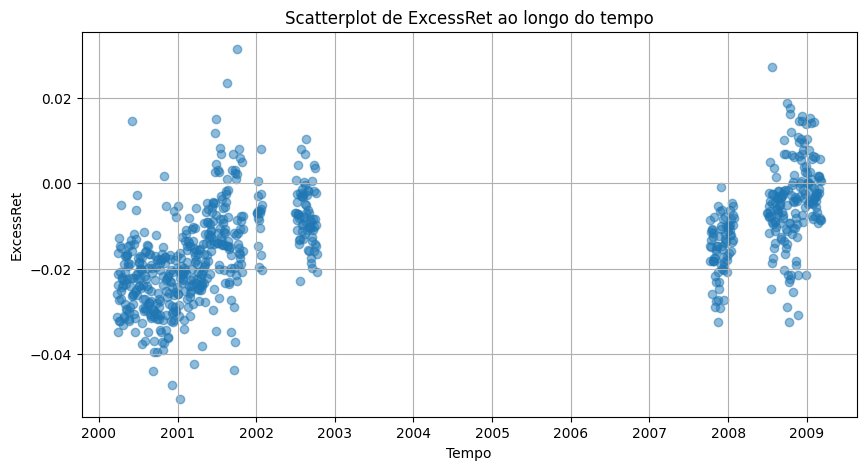

In [31]:
plt.figure(figsize=(10,5))
plt.scatter(df.index, df["ExcessRet"], alpha=0.5)
plt.xlabel("Tempo")
plt.ylabel("ExcessRet")
plt.title("Scatterplot de ExcessRet ao longo do tempo")
plt.grid(True)
plt.show()

In [32]:
# Matriz de correlação
corr = df.corr()
display(corr)

,Rm-Rf,SMB,HML,RMW,CMA,Mom,ST_Rev,LT_Rev,ExcessRet
Rm-Rf,1.000000,-0.104776,-0.038328,-0.461076,-0.477443,-0.460692,0.595535,-0.375278,0.131007
SMB,-0.104776,1.000000,0.051439,-0.270857,0.042446,0.096888,0.052836,0.339380,-0.042528
HML,-0.038328,0.051439,1.000000,0.275136,0.484090,-0.330958,-0.119913,0.474629,0.008710
RMW,-0.461076,-0.270857,0.275136,1.000000,0.622738,0.218580,-0.500846,0.099262,-0.060433
CMA,-0.477443,0.042446,0.484090,0.622738,1.000000,0.246786,-0.510677,0.524478,-0.081120
Mom,-0.460692,0.096888,-0.330958,0.218580,0.246786,1.000000,-0.277545,0.285327,-0.110022
ST_Rev,0.595535,0.052836,-0.119913,-0.500846,-0.510677,-0.277545,1.000000,-0.315893,0.161154
LT_Rev,-0.375278,0.339380,0.474629,0.099262,0.524478,0.285327,-0.315893,1.000000,-0.045830
ExcessRet,0.131007,-0.042528,0.008710,-0.060433,-0.081120,-0.110022,0.161154,-0.045830,1.000000


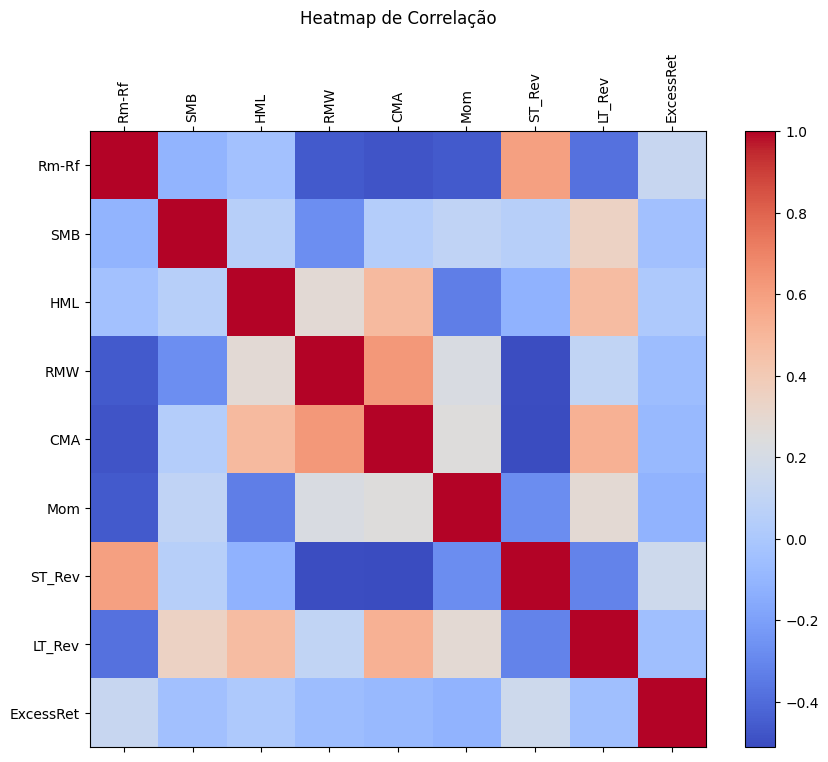

In [33]:
# heatmap das correlações

fig, ax = plt.subplots(figsize=(10,8))
cax = ax.matshow(corr, cmap="coolwarm")

# Barra de cores
plt.colorbar(cax)

# Colocar os nomes das variáveis no eixo
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.columns)

plt.title("Heatmap de Correlação", pad=20)
plt.show()

In [34]:
# correlação de ExcessRet com as demais
corr_with_excess = corr["ExcessRet"].drop("ExcessRet")
print(corr_with_excess)

Rm-Rf     0.131007
SMB      -0.042528
HML       0.008710
RMW      -0.060433
CMA      -0.081120
Mom      -0.110022
ST_Rev    0.161154
LT_Rev   -0.045830
Name: ExcessRet, dtype: float64


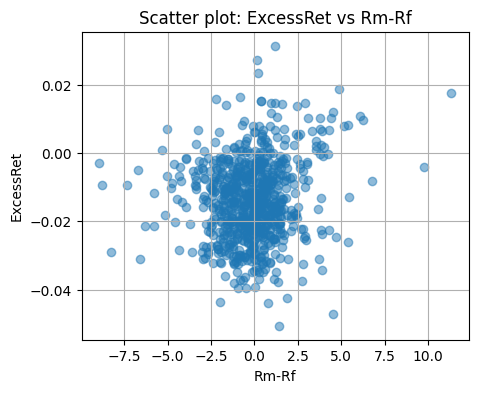

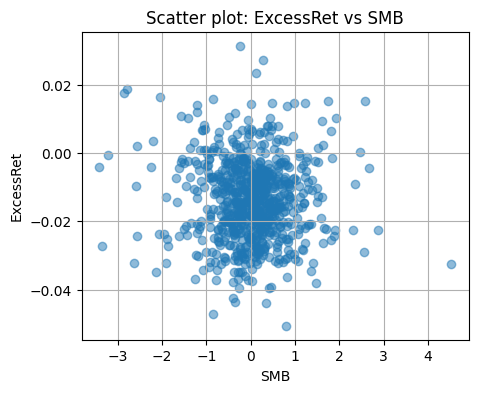

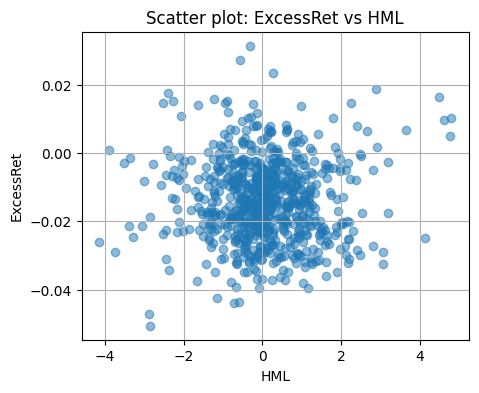

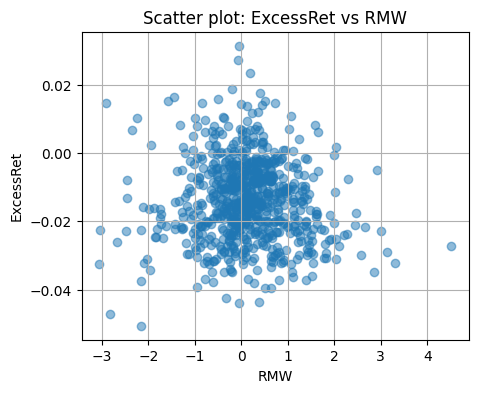

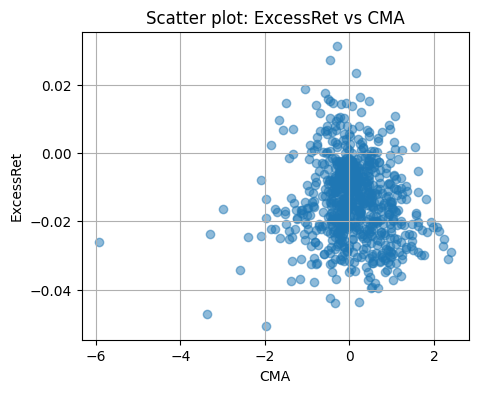

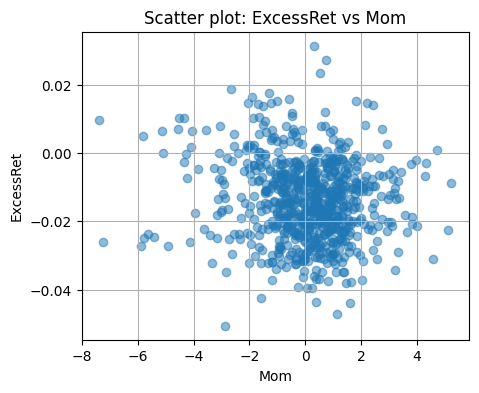

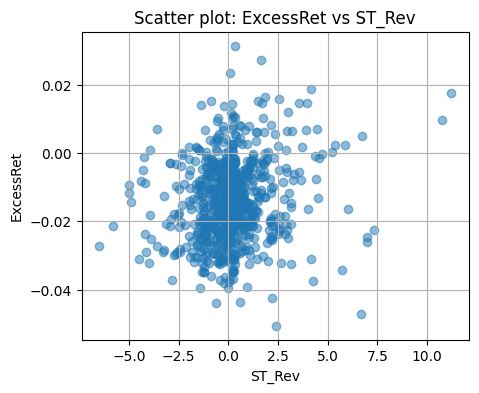

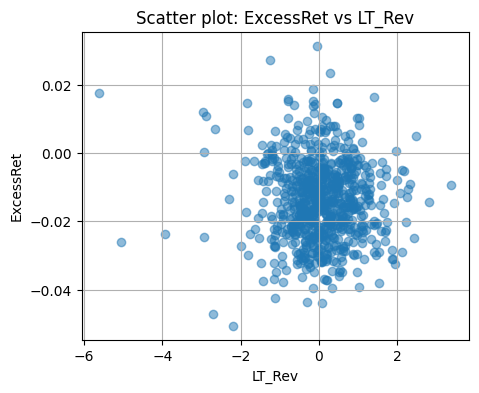

In [35]:
# observar scatterplot de Y contra demais

y = "ExcessRet"
X = ["Rm-Rf", "SMB", "HML", "RMW", "CMA", "Mom", "ST_Rev", "LT_Rev"]

for col in X:
    plt.figure(figsize=(5,4))
    plt.scatter(df[col], df[y], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel(y)
    plt.title(f"Scatter plot: {y} vs {col}")
    plt.grid(True)
    plt.show()

A dispersão das relações das variáveis X com variável Y não indicam linearidade.

# 2. Ajuste do Modelo Inicial

In [36]:
# aplicando a regressao

Y = df["ExcessRet"]
X = df[["Rm-Rf", "SMB", "HML", "RMW", "CMA", "Mom", "ST_Rev", "LT_Rev"]]
X_const = sm.add_constant(X)


model = sm.OLS(Y, X_const).fit()


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              ExcessRet   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     3.417
Date:                Thu, 02 Oct 2025   Prob (F-statistic):           0.000723
Time:                        15:16:22   Log-Likelihood:                 2237.5
No. Observations:                 737   AIC:                            -4457.
Df Residuals:                     728   BIC:                            -4416.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0140      0.000    -31.452      0.0

apenas ST_rev parece ser significativa, com p valor de 0.002.
MoM pode ser significativa.

In [37]:
resid = model.resid  # resíduos
fitted = model.fittedvalues  # valores ajustados

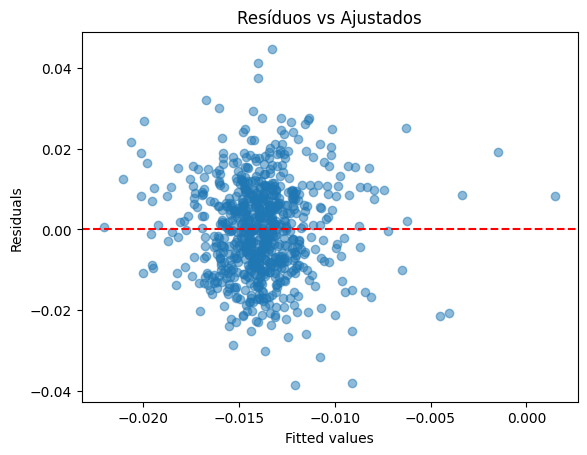

In [38]:
# Resíduos vs Valores Ajustados (checando homocedasticidade)
plt.scatter(fitted, resid, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Resíduos vs Ajustados")
plt.show()

Após analise dos residuos, a dispersão indica linearidade.

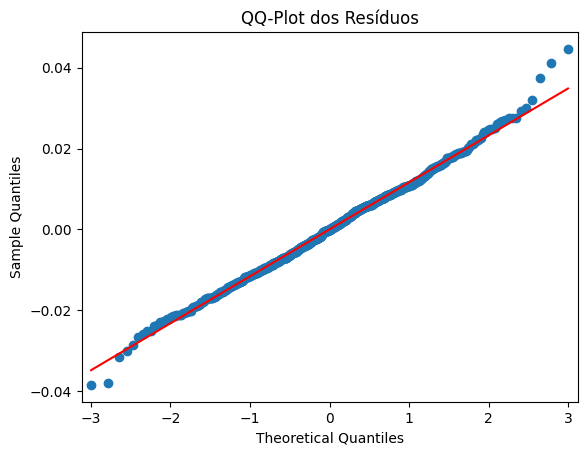

In [39]:
# QQ-plot (checando normalidade)
sm.qqplot(resid, line="s")
plt.title("QQ-Plot dos Resíduos")
plt.show()

Os resíduos são aproximadamente normais no centro, mas não seguem bem a normalidade nas caudas.

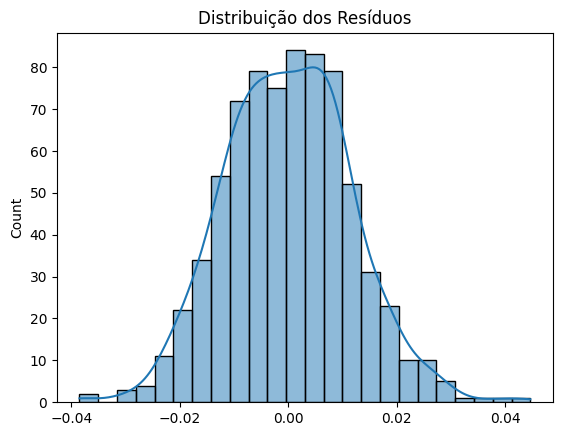

In [40]:
# Histograma dos resíduos
sns.histplot(resid, kde=True)
plt.title("Distribuição dos Resíduos")
plt.show()

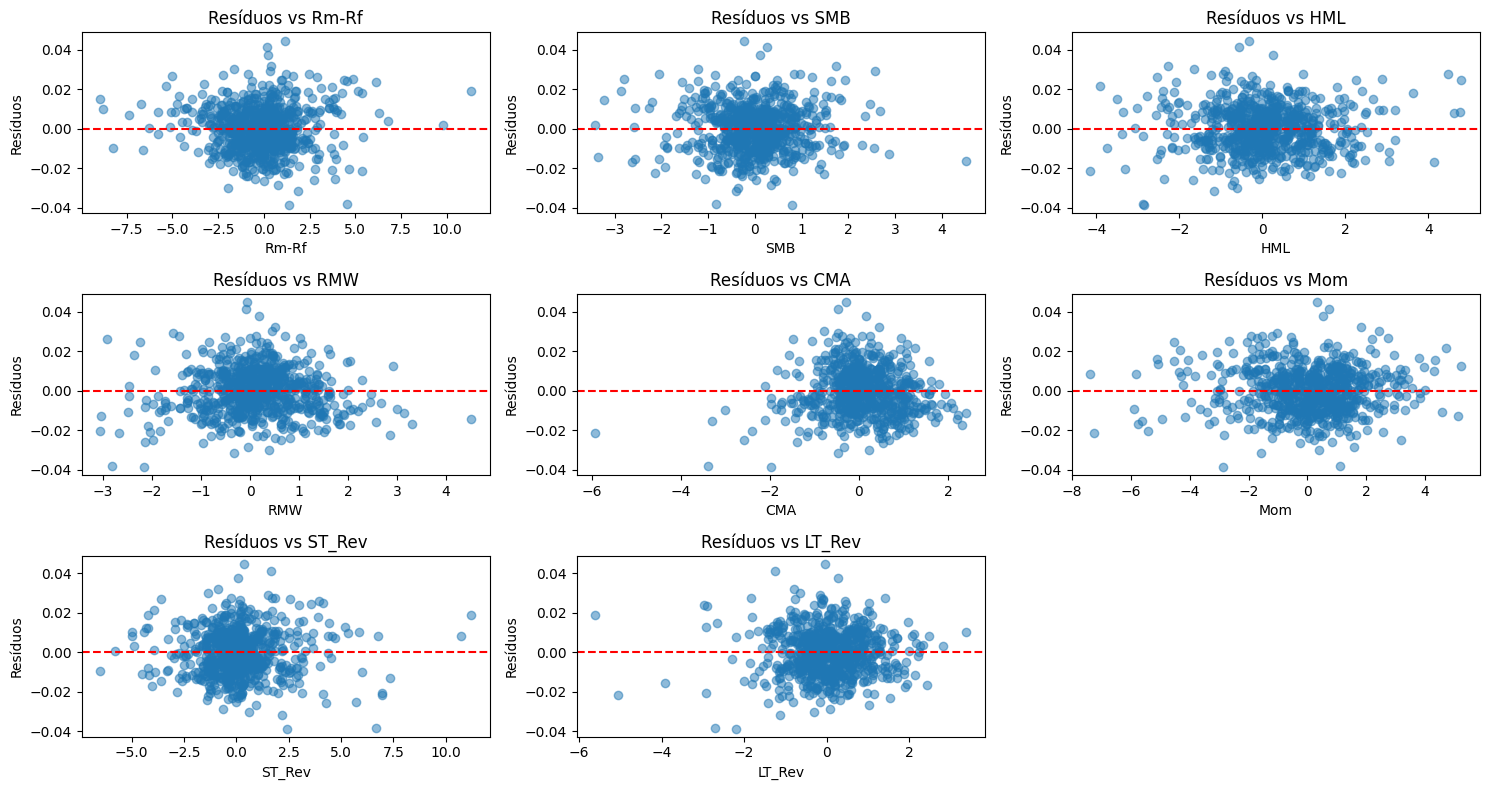

In [41]:
# lista de variáveis explicativas
vars_X = X.columns

# grid de gráficos (ajuste conforme o nº de variáveis)
n = len(vars_X)
ncols = 3
nrows = (n + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 8))
axes = axes.flatten()

for i, var in enumerate(vars_X):
    axes[i].scatter(X[var], resid, alpha=0.5)
    axes[i].axhline(0, color="red", linestyle="--")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Resíduos")
    axes[i].set_title(f"Resíduos vs {var}")

# remover eixos extras, se houver
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Residuos analisados contra cada variável independentemente, reforça a hipótese de linearidade do modelo.

# 3. Teste Box Cox aplicado à regressao

In [42]:
# 1. Pega variável dependente
Y = df["ExcessRet"].values

# 2. Ajusta deslocamento (se houver valores <= 0)
if np.any(Y <= 0):
    shift = abs(Y.min()) + 1e-6
    Y_shifted = Y + shift
else:
    shift = 0
    Y_shifted = Y

# 3. Aplica Box-Cox
Y_bc, lambda_bc = stats.boxcox(Y_shifted)

print("Lambda Box-Cox:", lambda_bc)

# 4. Regressão com Y transformado
X = df[["Rm-Rf", "SMB", "HML", "RMW", "CMA", "Mom", "ST_Rev", "LT_Rev"]]
X_const = sm.add_constant(X)

model_bc = sm.OLS(Y_bc, X_const).fit()
print(model_bc.summary())

Lambda Box-Cox: 0.7996145542019533
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     3.126
Date:                Thu, 02 Oct 2025   Prob (F-statistic):            0.00175
Time:                        15:16:25   Log-Likelihood:                 1741.5
No. Observations:                 737   AIC:                            -3465.
Df Residuals:                     728   BIC:                            -3424.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.

o Box-Cox transforma a variável dependente Y para que os resíduos do modelo fiquem mais próximos da normalidade e atendam melhor às hipóteses da regressão linear.

In [43]:
resid_bc = model_bc.resid  # resíduos
fitted_bc = model_bc.fittedvalues  # valores ajustados

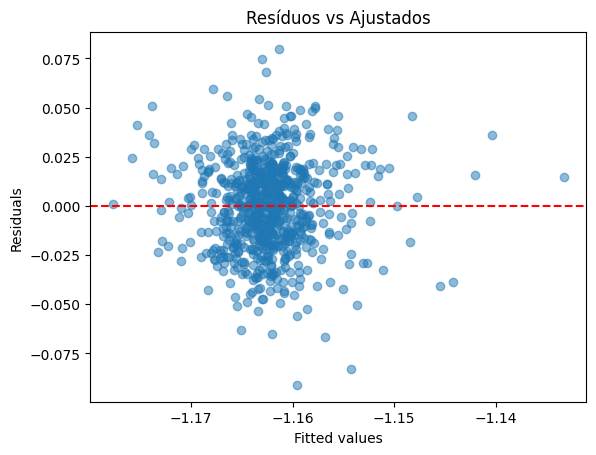

In [44]:
# Resíduos vs Valores Ajustados (checando homocedasticidade)
plt.scatter(fitted_bc, resid_bc, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Resíduos vs Ajustados")
plt.show()


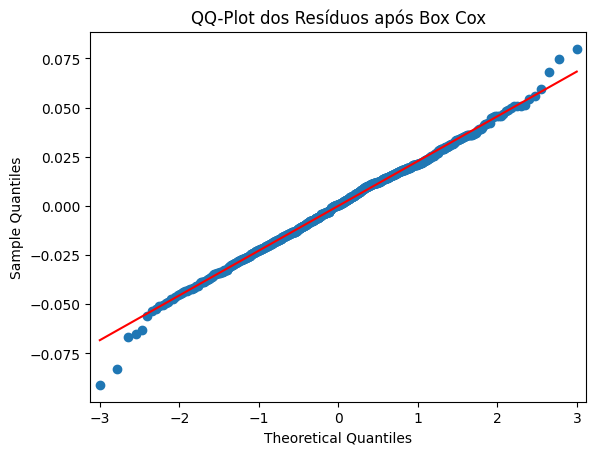

In [45]:

# QQ-plot (checando normalidade)
sm.qqplot(resid_bc, line="s")
plt.title("QQ-Plot dos Resíduos após Box Cox")
plt.show()



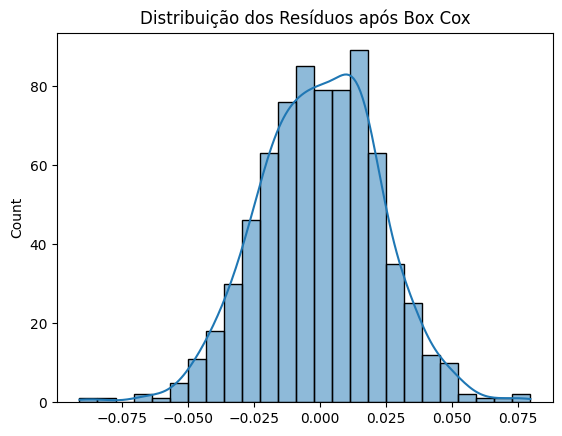

In [46]:
# Histograma dos resíduos
sns.histplot(resid_bc, kde=True)
plt.title("Distribuição dos Resíduos após Box Cox")
plt.show()

Dado que o lambda obtido no Box Cox foi 0.7996145542019533, ou seja, próximo a 1, e os resultados após ajuste nao demosntraram melhora quando plotados, optei por nao aplicar a transformação. 

O modelo inicialmente escolhido, será o "model", não o "model_bc".

# 4. Seleção do Modelo

In [47]:
# criando função forward

def forward_selection(X, Y, criterion="aic"):
    best_features = []
    remaining_features = list(X.columns)
    best_score = np.inf
    
    while remaining_features:
        scores = []
        for feature in remaining_features:
            trial_features = best_features + [feature]
            X_const = sm.add_constant(X[trial_features])
            model = sm.OLS(Y, X_const).fit()
            score = model.aic if criterion=="aic" else model.bic
            scores.append((score, feature, trial_features))
        
        scores.sort()
        best_new_score, best_new_feature, best_new_features = scores[0]
        
        if best_new_score < best_score:
            best_score = best_new_score
            best_features = best_new_features
            remaining_features.remove(best_new_feature)
        else:
            break
    
    # 🔑 Ajusta o modelo final só com as variáveis finais
    X_const = sm.add_constant(X[best_features])
    final_model = sm.OLS(Y, X_const).fit()
    
    return final_model, best_features



In [48]:
# Forward Selection usando AIC
forward_model, forward_features = forward_selection(X, Y, criterion="aic")
print("Forward Selection (AIC):", forward_features)
print(forward_model.summary())



Forward Selection (AIC): ['ST_Rev', 'Mom']
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     11.58
Date:                Thu, 02 Oct 2025   Prob (F-statistic):           1.12e-05
Time:                        15:16:27   Log-Likelihood:                 2235.4
No. Observations:                 737   AIC:                            -4465.
Df Residuals:                     734   BIC:                            -4451.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

In [49]:
# Forward Selection usando BIC
forward_model, forward_features = forward_selection(X, Y, criterion="bic")
print("Forward Selection (BIC):", forward_features)

print(forward_model.summary())

Forward Selection (BIC): ['ST_Rev']
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     19.60
Date:                Thu, 02 Oct 2025   Prob (F-statistic):           1.10e-05
Time:                        15:16:27   Log-Likelihood:                 2233.6
No. Observations:                 737   AIC:                            -4463.
Df Residuals:                     735   BIC:                            -4454.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0

In [50]:
# criando função backward

def backward_selection(X, Y, criterion="aic"):
    features = list(X.columns)
    best_score = np.inf
    best_features = features[:]  # copia inicial
    
    while features:
        scores = []
        for feature in features:
            trial_features = [f for f in features if f != feature]
            X_const = sm.add_constant(X[trial_features])
            model = sm.OLS(Y, X_const).fit()
            score = model.aic if criterion=="aic" else model.bic
            scores.append((score, trial_features))
        
        scores.sort()
        best_new_score, best_new_features = scores[0]
        
        if best_new_score < best_score:
            best_score = best_new_score
            features = best_new_features
            best_features = best_new_features
        else:
            break
    
    # 🔑 Ajusta o modelo final só com as variáveis finais
    X_const = sm.add_constant(X[best_features])
    final_model = sm.OLS(Y, X_const).fit()
    
    return final_model, best_features



In [51]:
# Backward Selection usando AIC
backward_model, backward_features = backward_selection(X, Y, criterion="aic")
print("Backward Selection (AIC):", backward_features)
print(backward_model.summary())

Backward Selection (AIC): ['Mom', 'ST_Rev']
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     11.58
Date:                Thu, 02 Oct 2025   Prob (F-statistic):           1.12e-05
Time:                        15:16:28   Log-Likelihood:                 2235.4
No. Observations:                 737   AIC:                            -4465.
Df Residuals:                     734   BIC:                            -4451.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

In [52]:
# Backward Selection usando BIC
backward_model, backward_features = backward_selection(X, Y, criterion="bic")
print("Backward Selection (BIC):", backward_features)
print(backward_model.summary())

Backward Selection (BIC): ['ST_Rev']
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     19.60
Date:                Thu, 02 Oct 2025   Prob (F-statistic):           1.10e-05
Time:                        15:16:28   Log-Likelihood:                 2233.6
No. Observations:                 737   AIC:                            -4463.
Df Residuals:                     735   BIC:                            -4454.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -

O critério AIC, tanto através de backward e forward, sugere usar o as variáveis MoM e ST_Rev.

O critério BIC, tanto através de backward e forward, sugere usar apenas a variável ST_Rev.

O modelo escolhido através de BIC valoriza a simplicidade e evita overfitting.
O modelo escolhido através de AIC privilegia menor erro de previsão, mesmo que mantenha algumas variáveis menos relevantes.

Neste caso, optarei pelo modelo AIC.

# 5. Teste de Multicolinearidade

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcula VIF
vif_data = pd.DataFrame()
vif_data["variavel"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif_data)

  variavel       VIF
0    const  1.065498
1    Rm-Rf  2.065705
2      SMB  1.310782
3      HML  2.615125
4      RMW  2.542676
5      CMA  2.801220
6      Mom  2.029761
7   ST_Rev  1.851715
8   LT_Rev  2.576702


In [54]:
## calcula autovalor

# Padroniza regressores (sem a constante): média 0, desvio 1
Z = (X - X.mean()) / X.std(ddof=0)

# SVD
U, s, Vt = np.linalg.svd(Z, full_matrices=False)   # s já vem em ordem decrescente
condition_indices = s[0] / s
cond_number = condition_indices.max()

ci_df = pd.DataFrame({
    "componente": [f"CI{i+1}" for i in range(len(s))],
    "condition_index": condition_indices
})
print(ci_df)
print("Número de Condição (máx CI):", cond_number)

  componente  condition_index
0        CI1         1.000000
1        CI2         1.439042
2        CI3         1.492880
3        CI4         2.279031
4        CI5         2.489715
5        CI6         2.947219
6        CI7         3.603017
7        CI8         4.221629
Número de Condição (máx CI): 4.221628736362883


In [55]:
# Decomposição em valores singulares
_, s, _ = np.linalg.svd(X_const)

# Índices de condição
condition_index = max(s) / min(s)
print("Número de Condição:", condition_index)

condition_indices = s.max() / s
print("Índices de Condição:", condition_indices)

Número de Condição: 6.827270793563935
Índices de Condição: [1.         1.62737596 2.12960322 2.356127   2.61269519 3.01784455
 4.30629674 5.56616553 6.82727079]


In [56]:
print(X.corr())

           Rm-Rf       SMB       HML       RMW       CMA       Mom    ST_Rev  \
Rm-Rf   1.000000 -0.104776 -0.038328 -0.461076 -0.477443 -0.460692  0.595535   
SMB    -0.104776  1.000000  0.051439 -0.270857  0.042446  0.096888  0.052836   
HML    -0.038328  0.051439  1.000000  0.275136  0.484090 -0.330958 -0.119913   
RMW    -0.461076 -0.270857  0.275136  1.000000  0.622738  0.218580 -0.500846   
CMA    -0.477443  0.042446  0.484090  0.622738  1.000000  0.246786 -0.510677   
Mom    -0.460692  0.096888 -0.330958  0.218580  0.246786  1.000000 -0.277545   
ST_Rev  0.595535  0.052836 -0.119913 -0.500846 -0.510677 -0.277545  1.000000   
LT_Rev -0.375278  0.339380  0.474629  0.099262  0.524478  0.285327 -0.315893   

          LT_Rev  
Rm-Rf  -0.375278  
SMB     0.339380  
HML     0.474629  
RMW     0.099262  
CMA     0.524478  
Mom     0.285327  
ST_Rev -0.315893  
LT_Rev  1.000000  


Como VIF é menor que 5, os índices de condição são menores que 30 e as correlações baixas, concluí-se que não há multicolinearidade no modelo.

# 6. Diagnósticos do Modelo

**Matriz H (leverage)**

Mede quanto uma observação é extrema no espaço das variáveis explicativas.

Análise: Calcula-se o valor diagonal hii da matriz chapéu.

Métrica: Média esperada é p/n. 
Valores hii>2p/n ou 3p/n indicam alto leverage (potencial influência).

**DFFITS**

Mede quanto a previsão Y^i muda se a observação i for retirada do modelo.

Análise: Combina leverage e resíduo studentizado.

Métrica: Observação é influente se ∣DFFITSi∣>2p/n

**DFBETAS**

Mede quanto o coeficiente βj muda ao remover a observação i.

Análise: Calcula o impacto ponto a ponto sobre cada parâmetro.

Métrica: ∣DFBETAij∣>2/n sugere influência relevante da observação sobre βj.

**COVRATIO**

Mede o efeito da exclusão de uma observação sobre a variância conjunta dos estimadores.

Análise: Compara determinante da matriz de covariância com e sem a observação.

Métrica: Valores fora do intervalo [1−3p/n,1+3p/n] indicam observações influentes.

**Resíduo studentizado**

Resíduo padronizado pelo erro-padrão ajustado da observação, ajustando a influência própria.

Análise: Usado para detectar outliers na variável dependente.

Métrica: Valores ∣ti∣>2 (ou>3 em amostras grandes) indicam possíveis outliers.

            COVRATIO    DFFITS  DFBETA_const  DFBETA_Rm-Rf  DFBETA_SMB  \
Date                                                                     
2000-03-24  0.989195 -0.077299     -0.058739      0.002150    0.013520   
2000-03-27  1.004418 -0.055597     -0.035521     -0.001567   -0.005566   
2000-03-28  1.019306 -0.034151     -0.009320      0.018621    0.014917   
2000-03-29  0.992071 -0.311382     -0.044040      0.034885    0.089369   
2000-03-30  1.019812 -0.125357     -0.027783      0.050080    0.039360   

            DFBETA_HML  DFBETA_RMW  DFBETA_CMA  DFBETA_Mom  DFBETA_ST_Rev  \
Date                                                                        
2000-03-24   -0.031937    0.021073    0.009227   -0.023354       0.025631   
2000-03-27    0.006671    0.024081   -0.033552   -0.014088      -0.002172   
2000-03-28   -0.005362   -0.007710    0.009500    0.010776      -0.013306   
2000-03-29   -0.040728   -0.132703    0.024827    0.091993      -0.007960   
2000-03-30   -0.012

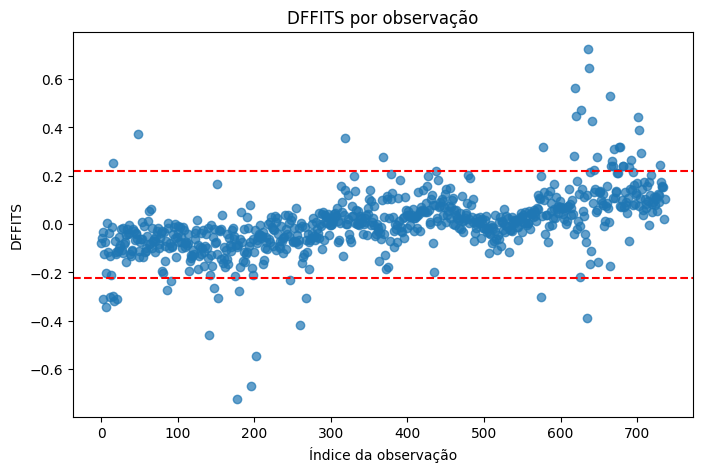

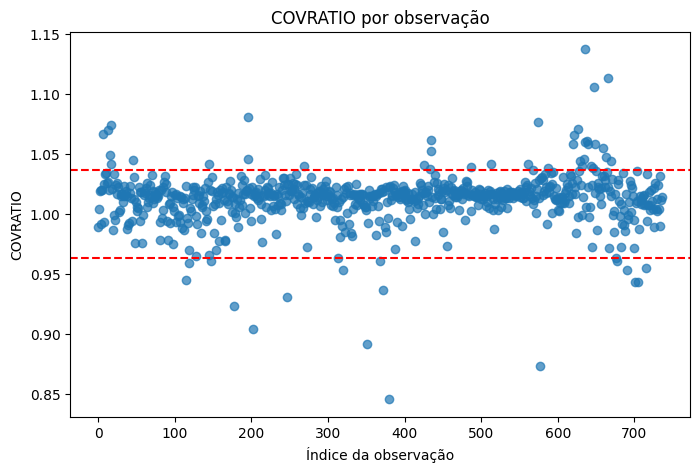

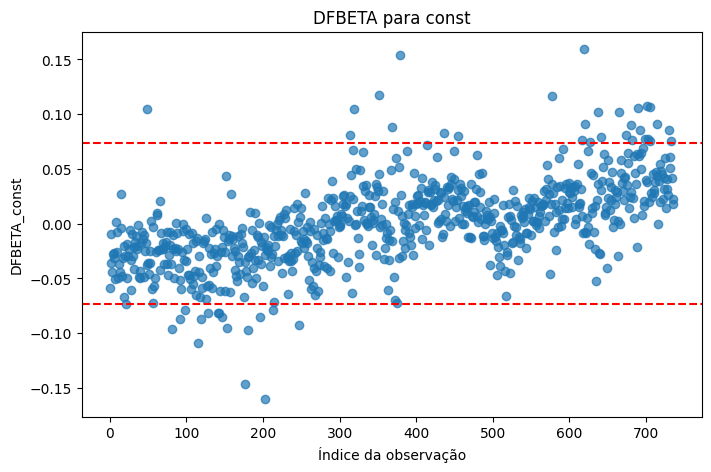

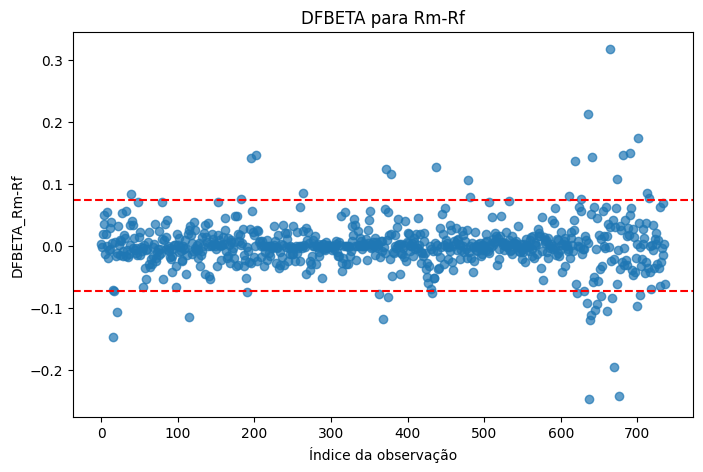

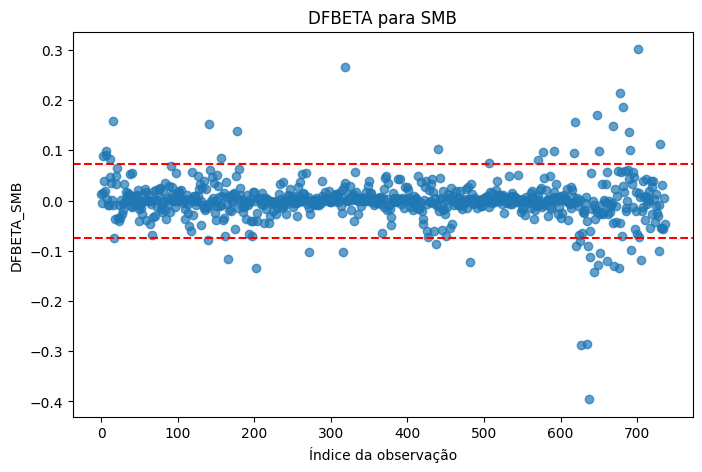

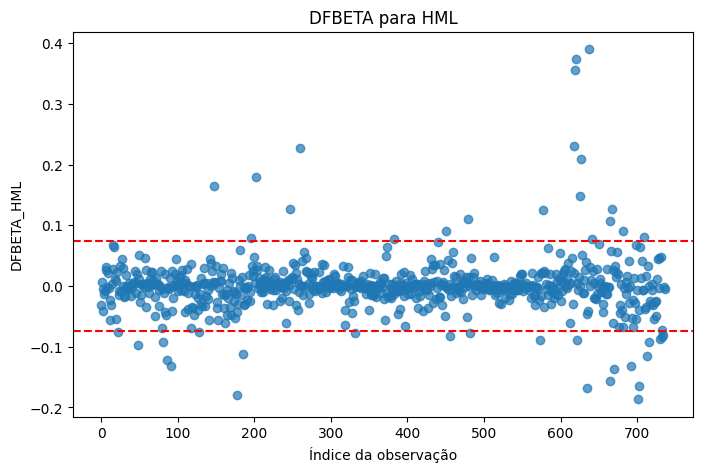

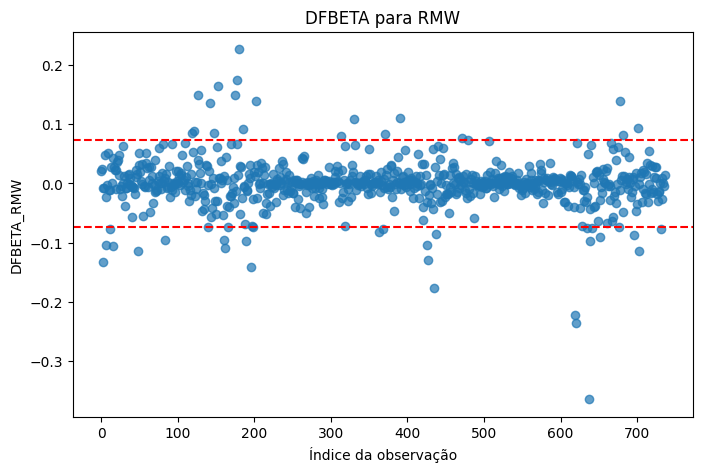

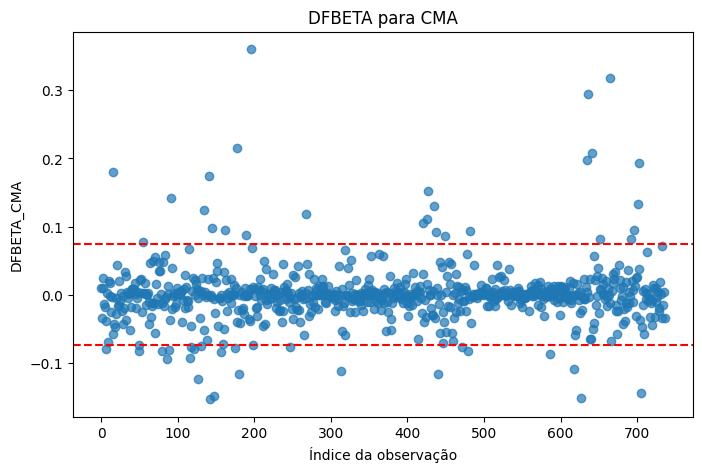

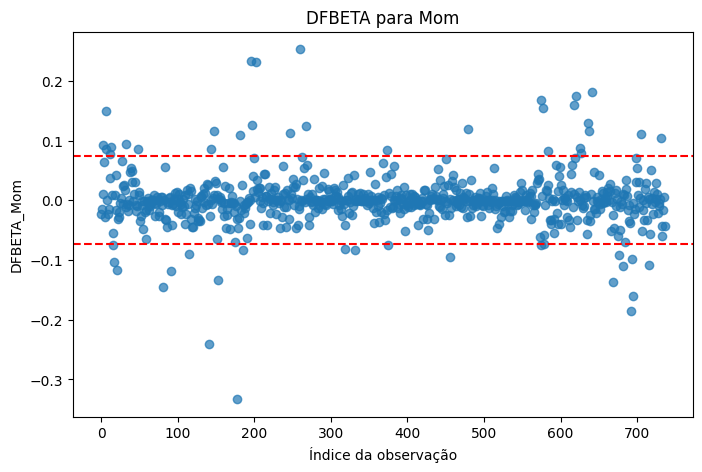

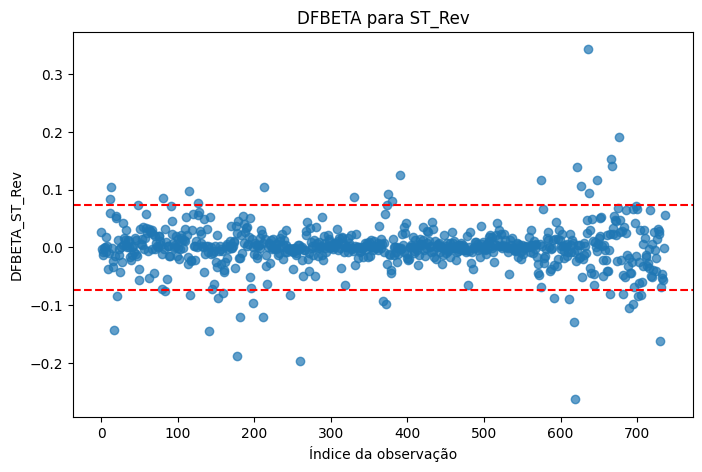

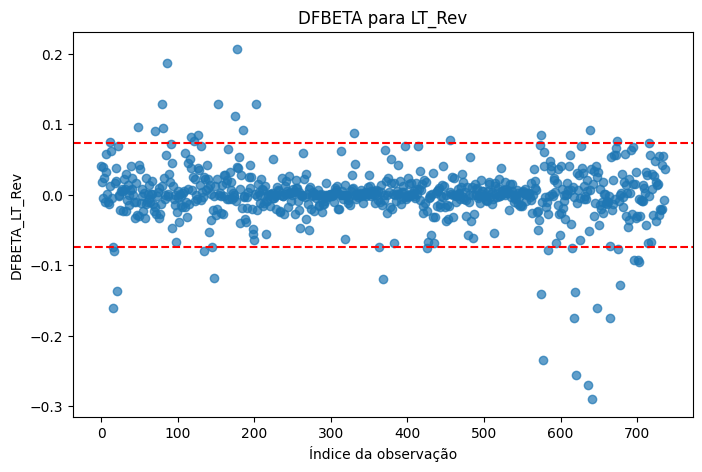

In [57]:

# --- Objeto de influência ---
influence = model.get_influence()

# 1) COVRATIO
covratio = influence.cov_ratio

# 2) DFFITS
dffits, _ = influence.dffits
p = X_const.shape[1]   # nº parâmetros (inclui constante)
n = X_const.shape[0]   # nº observações
limite_dffits = 2 * np.sqrt(p / n)

# 3) DFBETAS
dfbetas = influence.dfbetas

# --- Criar tabela consolidada ---
diagnosticos_df = pd.DataFrame({
    "COVRATIO": covratio,
    "DFFITS": dffits
}, index=df.index)

# adiciona DFBETAS para cada parâmetro
for i, col in enumerate(X_const.columns):
    diagnosticos_df[f"DFBETA_{col}"] = dfbetas[:, i]

# Exibir tabela
print(diagnosticos_df.head())

# --- Gráficos ---
## DFFITS
plt.figure(figsize=(8,5))
plt.scatter(range(n), dffits, alpha=0.7)
plt.axhline(y=limite_dffits, color="red", linestyle="--")
plt.axhline(y=-limite_dffits, color="red", linestyle="--")
plt.title("DFFITS por observação")
plt.xlabel("Índice da observação")
plt.ylabel("DFFITS")
plt.show()

## COVRATIO
limite_covratio_inf = 1 - 3*p/n
limite_covratio_sup = 1 + 3*p/n

plt.figure(figsize=(8,5))
plt.scatter(range(n), covratio, alpha=0.7)
plt.axhline(y=limite_covratio_inf, color="red", linestyle="--")
plt.axhline(y=limite_covratio_sup, color="red", linestyle="--")
plt.title("COVRATIO por observação")
plt.xlabel("Índice da observação")
plt.ylabel("COVRATIO")
plt.show()

## DFBETAS (um gráfico por coeficiente)
limite_dfbetas = 2 / np.sqrt(n)

for i, col in enumerate(X_const.columns):
    plt.figure(figsize=(8,5))
    plt.scatter(range(n), dfbetas[:, i], alpha=0.7)
    plt.axhline(y=limite_dfbetas, color="red", linestyle="--")
    plt.axhline(y=-limite_dfbetas, color="red", linestyle="--")
    plt.title(f"DFBETA para {col}")
    plt.xlabel("Índice da observação")
    plt.ylabel(f"DFBETA_{col}")
    plt.show()

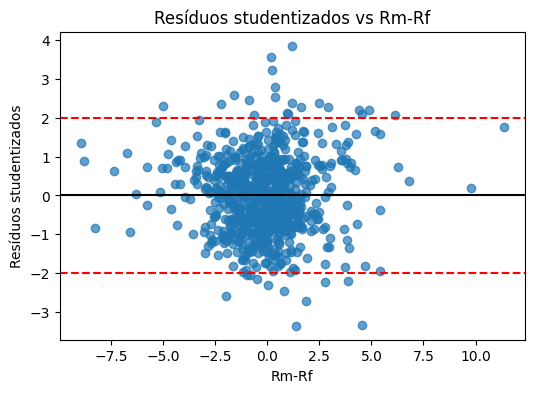

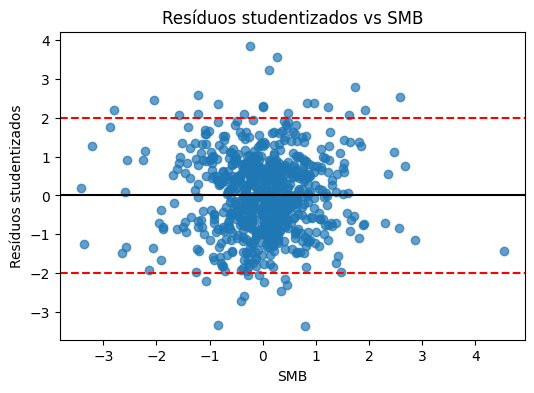

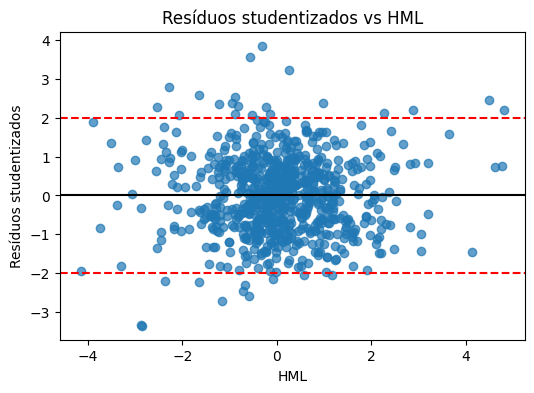

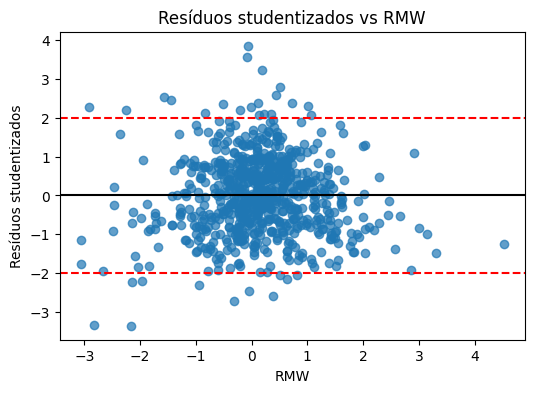

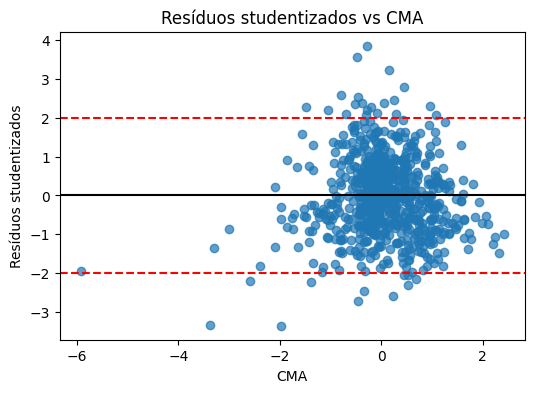

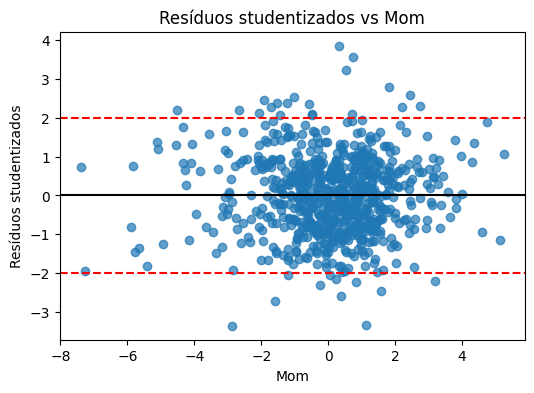

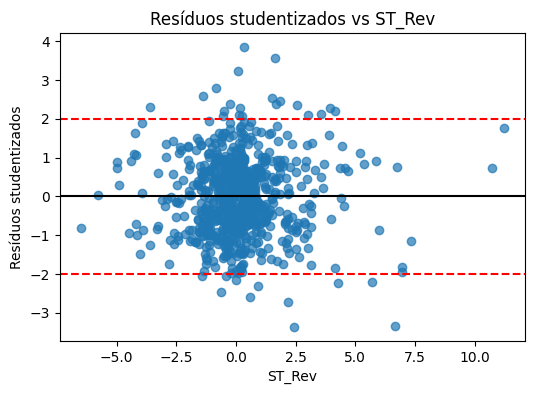

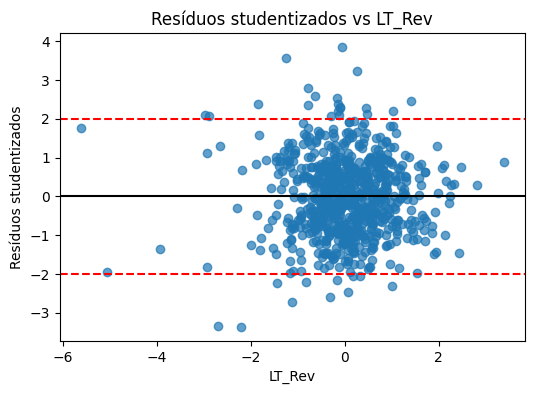

In [58]:
resid_stud = influence.resid_studentized_external

# --- Loop para cada variável de X
for col in X.columns:
    plt.figure(figsize=(6,4))
    plt.scatter(X[col], resid_stud, alpha=0.7)
    plt.axhline(y=0, color="black", linestyle="-")
    plt.axhline(y=2, color="red", linestyle="--")
    plt.axhline(y=-2, color="red", linestyle="--")
    plt.title(f"Resíduos studentizados vs {col}")
    plt.xlabel(col)
    plt.ylabel("Resíduos studentizados")
    plt.show()

   Observacao  Leverage
0           0  0.002826
1           1  0.003363
2           2  0.008416
3           3  0.025358
4           4  0.017809


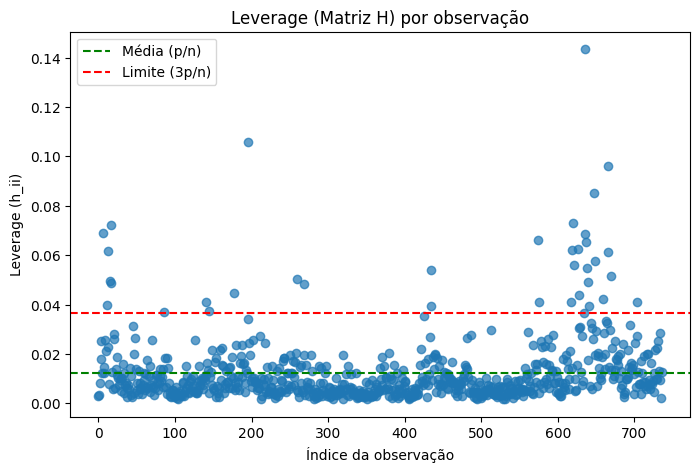

In [59]:
# --- Leverage (diagonal da matriz H) ---
h_ii = influence.hat_matrix_diag

# --- Parâmetros ---
p = X_const.shape[1]   # nº de parâmetros (inclui constante)
n = X_const.shape[0]   # nº de observações
h_mean = p / n         # leverage médio
limite_h = 3 * h_mean  # limite de corte usual

# --- Criar DataFrame com leverage ---
leverage_df = pd.DataFrame({
    "Observacao": range(n),
    "Leverage": h_ii
})

print(leverage_df.head())

# --- Gráfico ---
plt.figure(figsize=(8,5))
plt.scatter(range(n), h_ii, alpha=0.7)
plt.axhline(y=h_mean, color="green", linestyle="--", label="Média (p/n)")
plt.axhline(y=limite_h, color="red", linestyle="--", label="Limite (3p/n)")
plt.title("Leverage (Matriz H) por observação")
plt.xlabel("Índice da observação")
plt.ylabel("Leverage (h_ii)")
plt.legend()
plt.show()

In [ ]:
# === Tabela de diagnósticos completa ===
tabela_diag = pd.DataFrame({
    "COVRATIO": covratio,
    "DFFITS": dffits,
    "Resid_Stud": resid_stud,
    "Leverage": h_ii
}, index=df.index)

# adiciona DFBETAS para cada parâmetro
for i, col in enumerate(X_const.columns):
    tabela_diag[f"DFBETA_{col}"] = dfbetas[:, i]

# === Definir limites ===
limite_covratio_inf = 1 - 3*p/n
limite_covratio_sup = 1 + 3*p/n
limite_dfbetas = 2 / np.sqrt(n)

# === Criar tabela binária de observações influentes ===
flags = pd.DataFrame(index=df.index)

# 1) DFFITS
flags["DFFITS_flag"] = (np.abs(dffits) > limite_dffits).astype(int)

# 2) COVRATIO
flags["COVRATIO_flag"] = ((covratio < limite_covratio_inf) | (covratio > limite_covratio_sup)).astype(int)

# 3) DFBETAS (se qualquer beta da obs ultrapassar limite → conta como influente)
flags["DFBETAS_flag"] = (np.abs(dfbetas) > limite_dfbetas).any(axis=1).astype(int)

# 4) Resíduos studentizados (acima de ±2 considerados outliers)
flags["Resid_flag"] = (np.abs(resid_stud) > 2).astype(int)

# 5) Leverage (acima de 3p/n)
flags["Leverage_flag"] = (h_ii > limite_h).astype(int)

# === Ranking: soma total de flags ===
flags["Total_flags"] = flags.sum(axis=1)

# Ordenar do mais problemático para o menos
flags_ordenado = flags.sort_values(by="Total_flags", ascending=False)

# Exibir resultados 
print("Tabela de diagnósticos (primeiras 10 linhas):")
display(tabela_diag.head(10))

print("\nRanking de observações influentes:")
display(flags_ordenado.head(20))  # mostra top 20

# salvar em Excel para análise externa)
tabela_diag.to_excel("diagnosticos_completos.xlsx")
flags_ordenado.to_excel("observacoes_influentes_ranking.xlsx")

Tabela de diagnósticos (primeiras 10 linhas):


,COVRATIO,DFFITS,Resid_Stud,Leverage,DFBETA_const,DFBETA_Rm-Rf,DFBETA_SMB,DFBETA_HML,DFBETA_RMW,DFBETA_CMA,DFBETA_Mom,DFBETA_ST_Rev,DFBETA_LT_Rev
Date,,,,,,,,,,,,,
2000-03-24,0.989195,-0.077299,-1.452075,0.002826,-0.058739,0.002150,0.013520,-0.031937,0.021073,0.009227,-0.023354,0.025631,0.040658
2000-03-27,1.004418,-0.055597,-0.957056,0.003363,-0.035521,-0.001567,-0.005566,0.006671,0.024081,-0.033552,-0.014088,-0.002172,0.018297
2000-03-28,1.019306,-0.034151,-0.370692,0.008416,-0.009320,0.018621,0.014917,-0.005362,-0.007710,0.009500,0.010776,-0.013306,-0.003808
2000-03-29,0.992071,-0.311382,-1.930448,0.025358,-0.044040,0.034885,0.089369,-0.040728,-0.132703,0.024827,0.091993,-0.007960,0.039593
2000-03-30,1.019812,-0.125357,-0.930951,0.017809,-0.027783,0.050080,0.039360,-0.012577,-0.007038,-0.013421,0.063807,-0.000918,0.023899
2000-03-31,1.019700,-0.074539,-0.662696,0.012493,-0.031039,-0.012967,0.018901,-0.008115,0.048599,-0.018424,-0.028131,0.000173,-0.010158
2000-04-03,1.066347,-0.343390,-1.261030,0.069033,-0.026583,0.017989,0.090091,0.031960,-0.103645,-0.080137,0.148760,0.017929,0.057916
2000-04-04,0.993098,-0.202918,-1.661372,0.014699,-0.050276,0.054325,0.098494,0.026229,-0.023578,-0.038826,0.085795,-0.007625,0.032543
2000-04-05,1.024902,0.006340,0.057071,0.012191,0.001976,-0.000128,0.002331,-0.002251,-0.001926,0.002879,-0.000366,0.002050,0.000813



Ranking de observações influentes:


,DFFITS_flag,COVRATIO_flag,DFBETAS_flag,Resid_flag,Leverage_flag,Total_flags
Date,,,,,,
2000-12-05,1,1,1,1,1,5
2009-01-22,1,1,1,1,0,4
2000-04-14,1,1,1,0,1,4
2000-04-03,1,1,1,0,1,4
2008-12-30,1,1,1,1,0,4
2008-12-09,1,1,1,1,0,4
2008-12-10,1,1,1,1,0,4
2000-04-18,1,1,1,0,1,4
2008-11-24,1,1,1,0,1,4


# 7. Teste de Ljung-Box

In [62]:
# Observações com 4 ou mais flags
obs_influentes = flags[flags["Total_flags"] >= 4].index

print("Observações a remover:")
print(obs_influentes)

# Criar um novo df sem essas observações
df_filtrado = df.drop(obs_influentes)

print("Antes:", df.shape)
print("Depois:", df_filtrado.shape)

Observações a remover:
DatetimeIndex(['2000-04-03', '2000-04-14', '2000-04-17', '2000-04-18',
               '2000-10-13', '2000-10-23', '2000-12-05', '2001-01-03',
               '2001-01-11', '2001-03-19', '2001-04-18', '2001-06-29',
               '2001-09-17', '2008-07-21', '2008-09-18', '2008-09-19',
               '2008-09-30', '2008-10-10', '2008-10-13', '2008-10-14',
               '2008-10-20', '2008-10-29', '2008-11-21', '2008-11-24',
               '2008-12-01', '2008-12-09', '2008-12-10', '2008-12-30',
               '2009-01-15', '2009-01-22'],
              dtype='datetime64[ns]', name='Date', freq=None)
Antes: (737, 9)
Depois: (707, 9)


## 7.1 teste do modelo candidato ExcessRet ~ Mom + ST_Rev

In [ ]:
# teste do modelo candidato

## Analisando o modelo escolhido após remover observações influentes ( Excess ~ Mom + ST_Rev)
Y = df_filtrado["ExcessRet"]
X = df_filtrado[["Mom", "ST_Rev"]]
X_const = sm.add_constant(X)

model = sm.OLS(Y, X_const).fit()

print(model.summary())



                            OLS Regression Results                            
Dep. Variable:              ExcessRet   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     12.77
Date:                Thu, 02 Oct 2025   Prob (F-statistic):           3.57e-06
Time:                        15:27:03   Log-Likelihood:                 2201.5
No. Observations:                 707   AIC:                            -4397.
Df Residuals:                     704   BIC:                            -4383.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0142      0.000    -34.941      0.0

O p valor aponta para menor evidencia de significancia da variável Mom, após remover observações influentes. Decidi, então retirá-la.

In [66]:
## 7.2 modelo final escolhido
Y = df_filtrado["ExcessRet"]
X = df_filtrado[["ST_Rev"]]
X_const = sm.add_constant(X)

model = sm.OLS(Y, X_const).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              ExcessRet   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     22.34
Date:                Thu, 02 Oct 2025   Prob (F-statistic):           2.75e-06
Time:                        15:32:49   Log-Likelihood:                 2199.9
No. Observations:                 707   AIC:                            -4396.
Df Residuals:                     705   BIC:                            -4387.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0143      0.000    -35.137      0.0

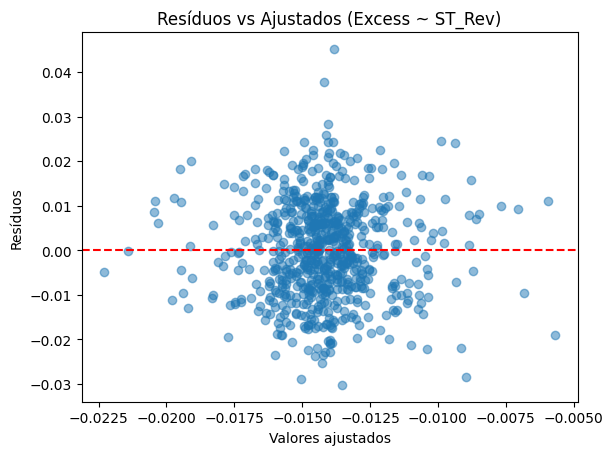

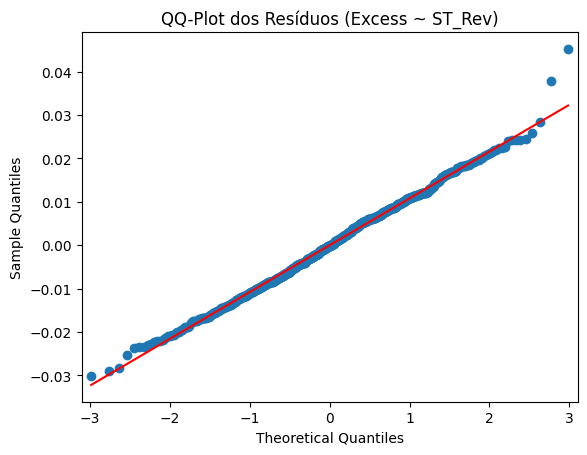

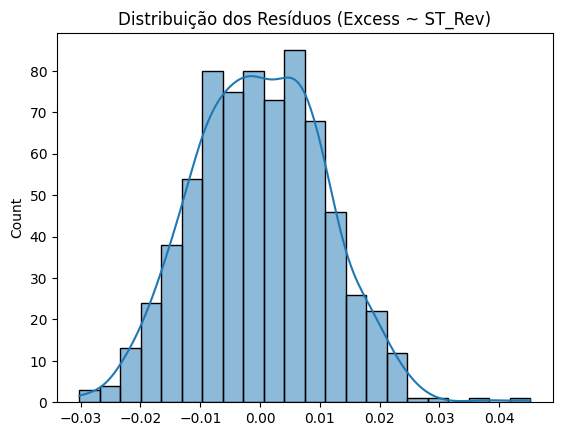

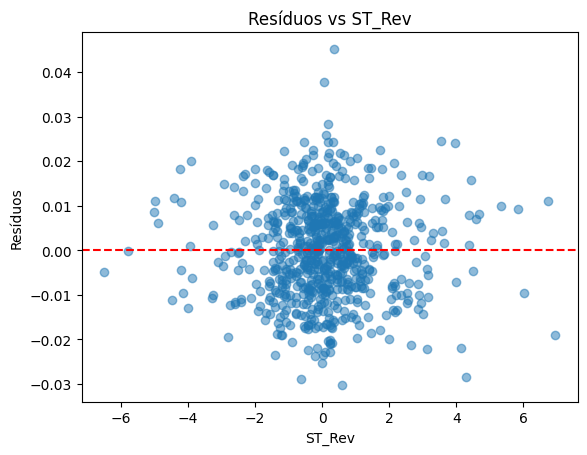

In [67]:

# Resíduos e valores ajustados
resid = model.resid
fitted = model.fittedvalues
# 1. Resíduos vs Ajustados (homocedasticidade)
plt.scatter(fitted, resid, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Valores ajustados")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Ajustados (Excess ~ ST_Rev)")
plt.show()


# 2. QQ-Plot (normalidade dos resíduos)
sm.qqplot(resid, line="s")
plt.title("QQ-Plot dos Resíduos (Excess ~ ST_Rev)")
plt.show()

# 3. Histograma dos resíduos
sns.histplot(resid, kde=True)
plt.title("Distribuição dos Resíduos (Excess ~ ST_Rev)")
plt.show()
# loop para cada variável explicativa
for var in X.columns:
    plt.scatter(X[var], resid, alpha=0.5)
    plt.axhline(0, color="red", linestyle="--")
    plt.xlabel(var)
    plt.ylabel("Resíduos")
    plt.title(f"Resíduos vs {var}")
    plt.show()

o p valor 0 indica autocorrelação nos residuos

# 8. Importância Relativa dos Regressors


In [ ]:

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              ExcessRet   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     22.34
Date:                Thu, 02 Oct 2025   Prob (F-statistic):           2.75e-06
Time:                        15:34:21   Log-Likelihood:                 2199.9
No. Observations:                 707   AIC:                            -4396.
Df Residuals:                     705   BIC:                            -4387.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0143      0.000    -35.137      0.0

**ST_Rev:** A cada 1 unidade de ST_Rev, o Excesso de retorno varia em média 0.0012 unidades, mantendo as demais variáveis estáveis.

**Constante:** A média do Excesso de retorno, desconsiderando as demais variáveis é -0.0143.





# 9. Resultados

![diagnosticos](diagnosticos.png)

!![observacoes_influentes](observacoes_influentes.png)

# 10. Conclusões

**Modelo final escolhido:** O modelo final escolhido foi Excess ~ ST_Rev. As demais variáveis nao apresentaram significância ou contribuição robusta para o coeficiente de determinação.

**Conclusão:** 
 - O modelo de regressão indica que a variável ST_Rev possui coeficiente positivo e estatisticamente significativo, evidenciando que o ativo analisado varia positivamente em relação à variável ST_Rev.
 
 - Já a constante negativa (-0,0143) representa o excesso de retorno esperado quando o fator ST_Rev não contribui.
 
 - o R² baixo (3,1%) sugere que esse único fator tem pouca capacidade de explicar a variação total dos retornos.